In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import nltk
from helper_functions import read_json_
from config import PATHES
from collections import Counter
import json



#from readability import Readability

# Ensuring NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/erikrubinov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erikrubinov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

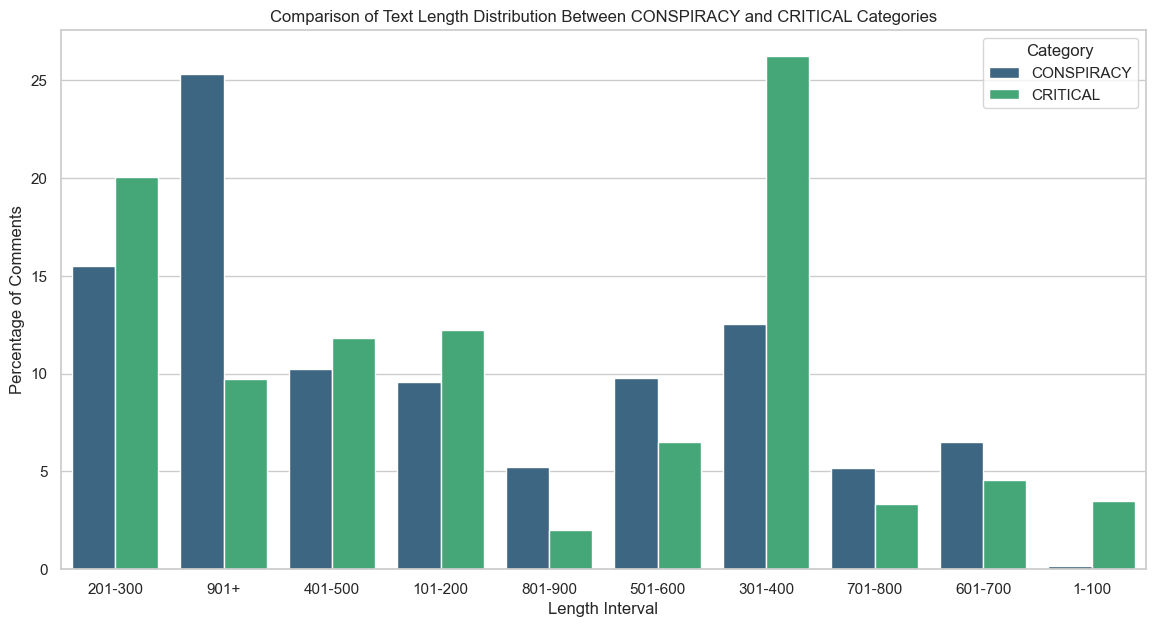

In [28]:


# Function to categorize the length into intervals
def categorize_length(length):
    if length <= 100:
        return '1-100'
    elif length <= 200:
        return '101-200'
    elif length <= 300:
        return '201-300'
    elif length <= 400:
        return '301-400'
    elif length <= 500:
        return '401-500'
    elif length <= 600:
        return '501-600'
    elif length <= 700:
        return '601-700'  # Adjusted interval correction
    elif length <= 800:
        return '701-800'
    elif length <= 900:
        return '801-900'
    else:
        return '901+'  # Adjusted to correctly include all longer comments

# Read JSON data
data = json.loads(open("Oppositional_thinking_analysis_dataset.json").read())

CONSPIRACY = []
CRITICAL = []
for comment in data:
    if comment["category"] == "CONSPIRACY":
        CONSPIRACY.append(len(comment["text"]))
    else:
        CRITICAL.append(len(comment["text"]))

# Count occurrences in specified intervals
occurrences_CONSPIRACY = Counter([categorize_length(length) for length in CONSPIRACY])
occurrences_CRITICAL = Counter([categorize_length(length) for length in CRITICAL])

# Data preparation for plotting
results = []
categories = ['CONSPIRACY', 'CRITICAL']
for category, occurrences in zip(categories, [occurrences_CONSPIRACY, occurrences_CRITICAL]):
    total = sum(occurrences.values())
    for length_interval, count in occurrences.items():
        results.append({
            'Category': category,
            'Interval': length_interval,
            'Percentage': (count / total) * 100
        })

df = pd.DataFrame(results)

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
sns.barplot(x='Interval', y='Percentage', hue='Category', data=df, palette='viridis')

plt.title('Comparison of Text Length Distribution Between CONSPIRACY and CRITICAL Categories')
plt.xlabel('Length Interval')
plt.ylabel('Percentage of Comments')
plt.legend(title='Category')

plt.show()

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def get_vocabulary_richness(text:str) -> int:

    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return len(lemmatized_tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/erikrubinov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erikrubinov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/erikrubinov/nltk_data...


Original Tokens: ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', 'it', 'was', 'not', 'so', 'lazy', 'after', 'all', '.']
Filtered Tokens: ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.', 'lazy', '.']
Lemmatized Tokens: ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog', '.', 'lazy', '.']
